In [50]:
# https://github.com/Nguyencongphu10/Phu?fbclid=IwAR2pioiLC5Mj0Eq5MIh7PwJrNLAo52hLe9mOAtQe7a2ZVDdPSCYzKU7u8KI
# Nguyễn Công PHú -19146238 lớp tối thứ 5

In [51]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[212 216 218 ... 208 213 220]
 [213 217 218 ... 210 212 219]
 [214 219 220 ... 214 211 217]
 ...
 [204 206 203 ... 205 207 209]
 [204 205 203 ... 205 207 209]
 [203 204 204 ... 204 206 207]]


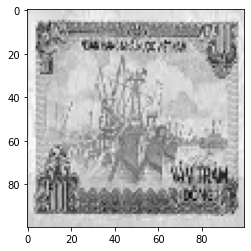

In [53]:
datadir = "/content/drive/MyDrive/money"
categories=['500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [54]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 2/2 [00:00<00:00, 535.71it/s]

19


In [55]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (19, 100, 100, 1)
y (19,)


In [56]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/money/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/money/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [57]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [58]:
pickle_in = open("/content/drive/MyDrive/money/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/money/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (19, 100, 100, 1)
y (19,)


In [59]:
y= to_categorical(y,11)

In [60]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [61]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=50,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 743ms/step - loss: 3.3374 - accuracy: 0.0588 - val_loss: 19.9956 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 50ms/step - loss: 7.9401 - accuracy: 0.1176 - val_loss: 9.4019 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 49ms/step - loss: 3.6453 - accuracy: 0.1176 - val_loss: 5.8132 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 3.1950 - accuracy: 0.1176 - val_loss: 4.0188 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 2.5628 - accuracy: 0.1176 - val_loss: 3.4088 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 2.3135 - accuracy: 0.1765 - val_loss: 3.1262 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 51ms/step - loss: 2.2614 - accuracy: 0.2353 - val_loss: 3.2184 - val_accuracy: 0.0000e+

In [62]:
model.save('money.h5')

In [63]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

In [64]:
labels = {0: '500',
          1: '1000',
          2: '2000',
          3: '50000',
          4: '10000',
          5: '20000',
          6: '50000',
          7: '100000',
          8: '200000',
          9: '500000',          
          }
model = load_model('money.h5')

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation 20000


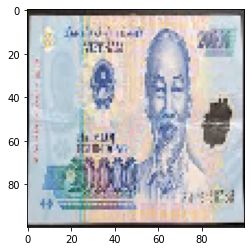

In [65]:
	# load model
img = load_image('/content/drive/MyDrive/money/20000/1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 2000


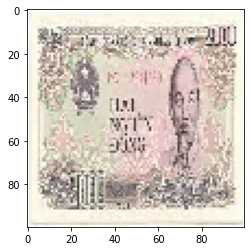

In [66]:
	# load model
img = load_image('/content/drive/MyDrive/money/2000/1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

In [69]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('money.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/money.ipynb to pdf
[NbConvertApp] Support files will be in money_files/
[NbConvertApp] Making directory ./money_files
[NbConvertApp] Making directory ./money_files
[NbConvertApp] Making directory ./money_files
[NbConvertApp] Writing 54073 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 249939 bytes to /content/drive/My Drive/money.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'